<a href="https://colab.research.google.com/github/Layana7592/Machine_Learning_Projects/blob/main/Simple_vs_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **POLYNOMIAL REGRESSION**

**Reading CSV File for Polynomial Regression Analysis**

In [37]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/poly.csv")
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


**Showing the structure and data types**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sno          6 non-null      int64  
 1   Temperature  6 non-null      int64  
 2   Pressure     6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 276.0 bytes


**Data Preprocessing: Dropping Irrelevant Features**

In [39]:
df.drop(['sno'],axis=1)
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [40]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

**Splitting Features and Target Variable**

In [41]:
x=df.iloc[:,1:2]
y=df.iloc[:,2]

**Fit Linear Regression Model on Training Data**

In [42]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

**Performance Evaluation of Regression Model**

In [43]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print("MAPE is :",mean_absolute_percentage_error(y,y_pred))


MAPE is : 44.775078189300416


In [44]:
print("r2 Score is :",r2_score(y,y_pred))

r2 Score is : 0.690349972603981


**Visualize Results of Simple Linear Regression**

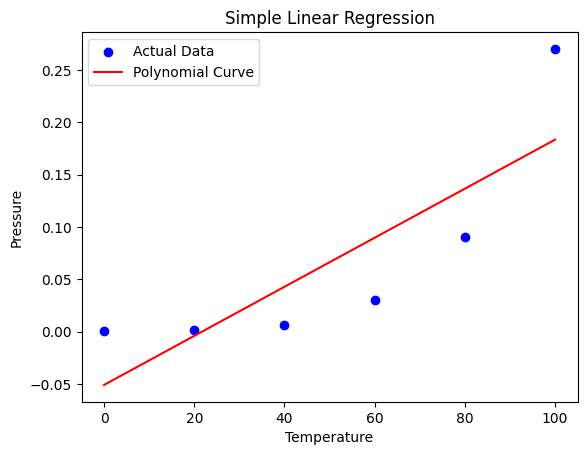

In [45]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='blue', label='Actual Data')
plt.plot(x,y_pred,color='red', label='Polynomial Curve')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Simple Linear Regression")
plt.legend()


**Feature Transformation using Polynomial Features (Degree = 3)**

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

**Train Polynomial Regression Model and Generate Predictions**

In [47]:
model1=LinearRegression()
model1.fit(x_poly,y)
y_poly=model1.predict(x_poly)
y_poly

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

**Performance Evaluation of Polynomial Regression Model**

In [48]:
print("MAPE is :",mean_absolute_percentage_error(y,y_poly))

MAPE is : 2.7865912208923658


In [49]:
print("r2 Score is :",r2_score(y,y_poly))

r2 Score is : 0.9966691251761722


**Graphical Representation of Polynomial Regression**

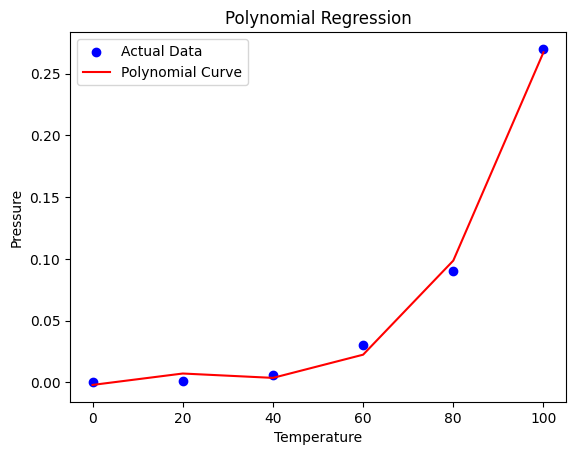

In [50]:
plt.scatter(x,y,color='blue', label='Actual Data')
plt.plot(x,y_poly,color='red', label='Polynomial Curve')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Polynomial Regression")
plt.legend()

**Prediction Comparison: Linear vs Polynomial Regression**

In [51]:
df1=pd.DataFrame({'Actual_value ':y,
                  'Simple Linear Regression ':y_pred,
                  'Polynomial Regression':y_poly})
df1

,Actual_value,Simple Linear Regression,Polynomial Regression
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289
